In [100]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation

pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)

%matplotlib inline
plt.style.use('ggplot')


In [2]:
df = pd.read_csv("Boston.csv")

In [9]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:


# 1. CRIM: per capita crime rate by town
# 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS: proportion of non-retail business acres per town
# 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX: nitric oxides concentration (parts per 10 million)
# 6. RM: average number of rooms per dwelling
# 7. AGE: proportion of owner-occupied units built prior to 1940
# 8. DIS: weighted distances to five Boston employment centres
# 9. RAD: index of accessibility to radial highways
# 10. TAX: full-value property-tax rate per $10,000
# 11. PTRATIO: pupil-teacher ratio by town
# 12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13. LSTAT: % lower status of the population
# 14. MEDV: Median value of owner-occupied homes in $1000's

In [5]:
df.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv'],
      dtype='object')

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


IndexError: index 14 is out of bounds for axis 0 with size 14

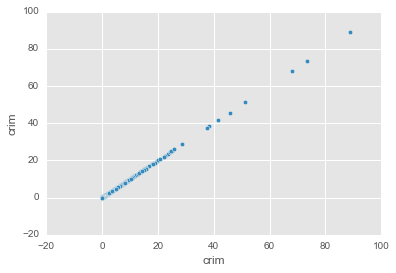

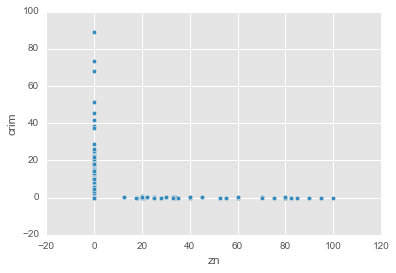

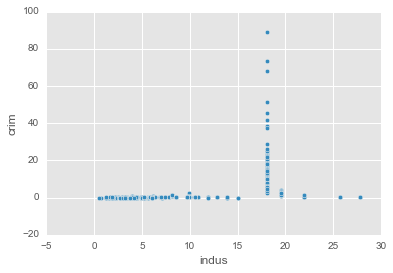

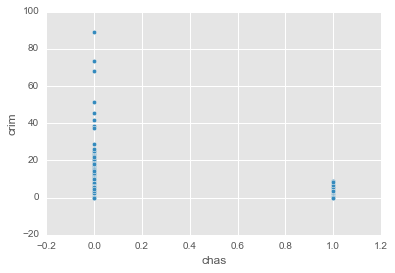

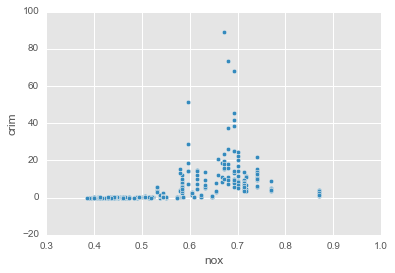

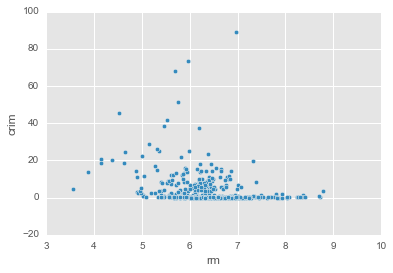

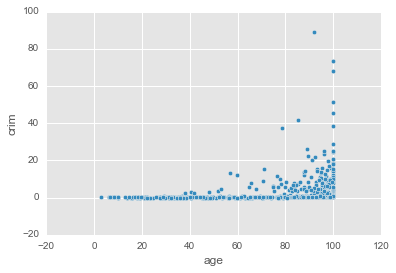

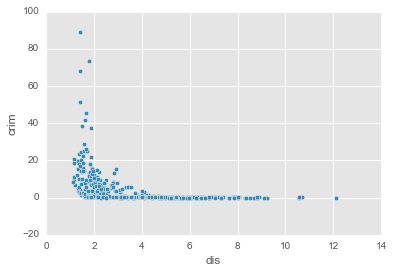

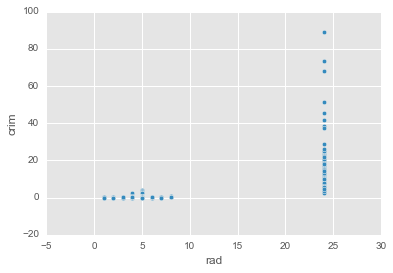

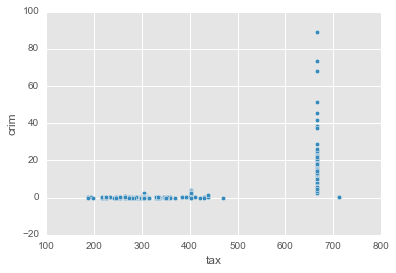

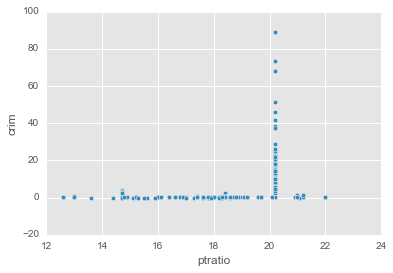

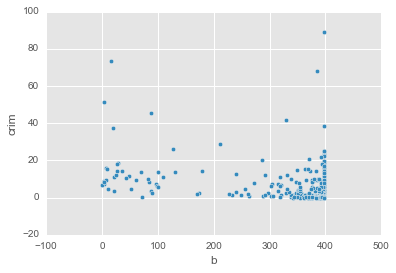

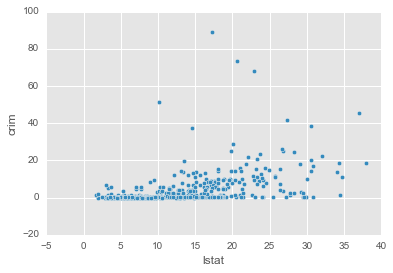

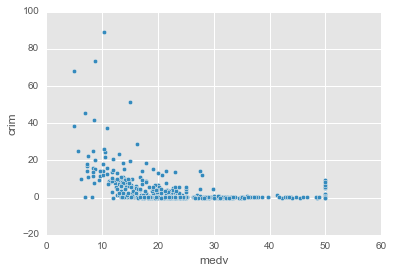

In [13]:
for i in range(0,len(df) - 1 ):
    df.plot(kind = 'scatter' , x = df.columns[i] , y = 'crim')

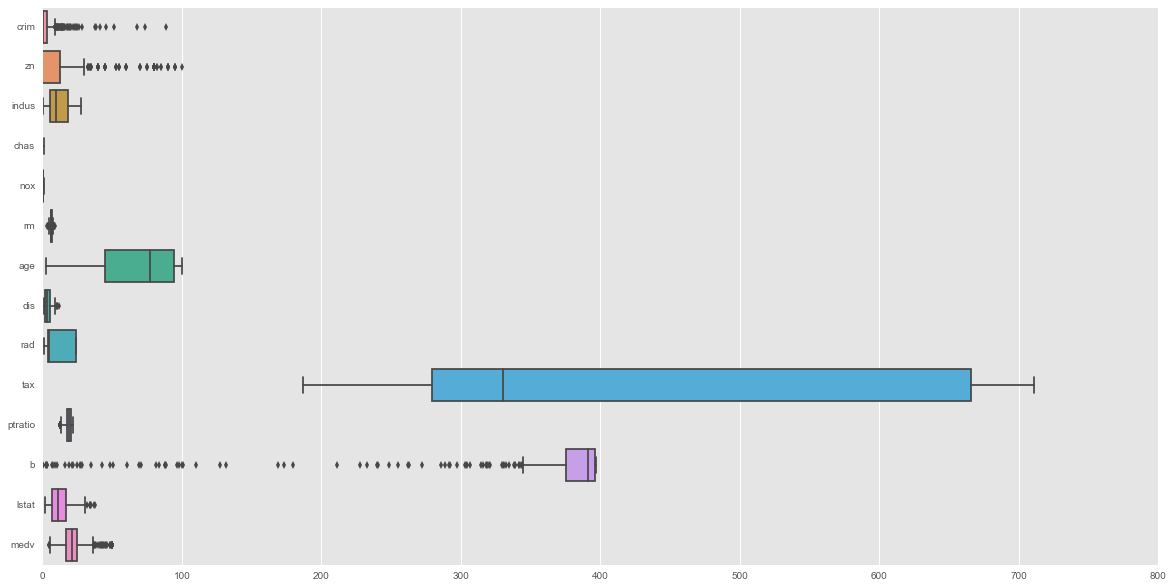

In [26]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df , orient = 'h')

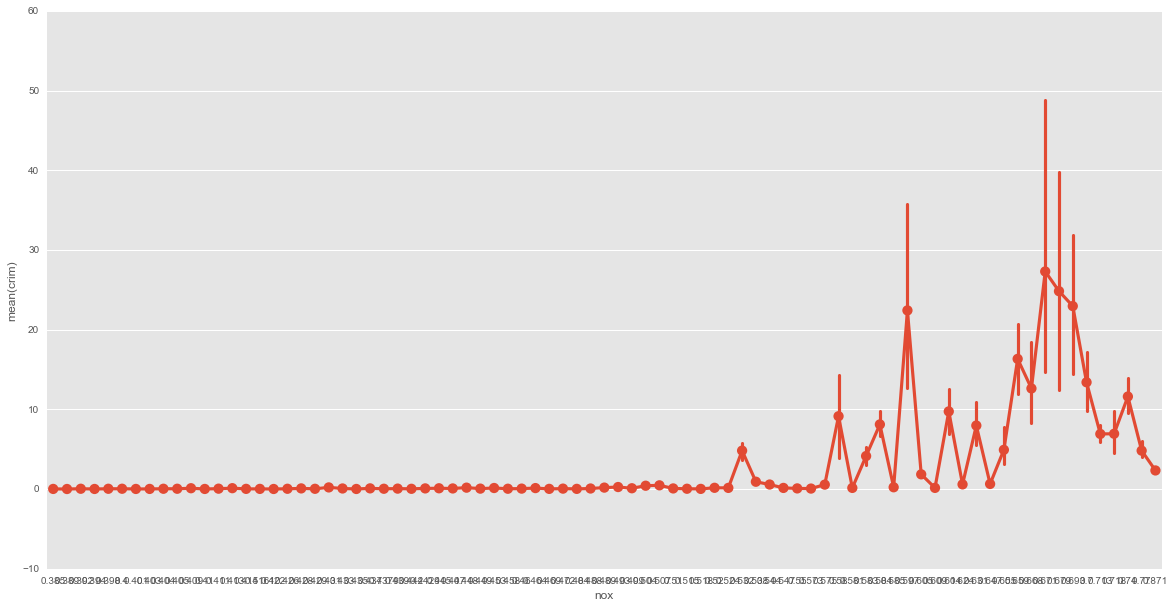

In [22]:
plt.figure(figsize = (20,10))
sns.pointplot(x = 'nox' , y = 'crim' , data = df)

In [28]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [83]:
df['crim_med'] = df.crim > df.crim.median()

In [84]:
df['crim_med'] = 1* df.crim_med

In [85]:
df.crim_med.value_counts()

1    253
0    253
Name: crim_med, dtype: int64

In [86]:
y = df.crim_med

In [87]:
X = df

In [88]:
X = X.drop('crim_med' , axis =1 )

In [70]:
X.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv'],
      dtype='object')

In [74]:
model_sm = sm.Logit(y , X).fit()


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [75]:
X.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [89]:
np.linalg.matrix_rank(X.values)

14

In [90]:
len(X.columns)

14

In [80]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.2)

In [81]:
model_sk = linear_model.LogisticRegression()

In [82]:
model_sk.fit(train_X , train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
model_sk.score(train_X , train_y)

0.90346534653465349

In [96]:
cross_validation.cross_val_score(model_sk, train_X, train_y, cv = 10).mean()

0.89829268292682918

In [94]:
y_hat_sk = model_sk.predict(test_X)

In [95]:
(y_hat_sk==test_y).mean()

0.86274509803921573

In [97]:
df['Accuracy'] = (y_hat_sk==test_y)

In [98]:
df.Accuracy.value_counts()

True     88
False    14
Name: Accuracy, dtype: int64

In [104]:
metrics.confusion_matrix(test_y, y_hat_sk, labels=None)

array([[11,  6],
       [ 8, 77]])

# KNN